In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#准备数据
def get_data():
	X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
	Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
	return X,Y

In [12]:
#占位符
def get_placeholder():
	x_placeholder = tf.placeholder(tf.float32)
	y_placeholder = tf.placeholder(tf.float32)
	return x_placeholder,y_placeholder

In [13]:
#获得权重和偏置，这里因为是单个特征的线性规划，权重也是一维的
def get_weights():
	return tf.Variable(tf.truncated_normal([1],stddev=0.1),name="weights")

def get_bias():
	return tf.Variable(tf.zeros(shape=[1]),name = 'bias')

In [14]:
#预测函数
def inference(x):
	weights = get_weights()
	bias = get_bias()
	pred = tf.add(tf.multiply(x,weights),bias)
	return pred

In [15]:
#定义损失函数
def loss(pred,label):
	return tf.losses.mean_squared_error(pred,label)

W1111 15:54:32.720283 29388 deprecation.py:323] From D:\Anaconda3\lib\site-packages\tensorflow\python\ops\losses\losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


10 epoch cost is 0.020061
20 epoch cost is 0.015531
30 epoch cost is 0.011732
40 epoch cost is 0.008591
50 epoch cost is 0.006039
60 epoch cost is 0.004015
70 epoch cost is 0.002461
80 epoch cost is 0.001327
90 epoch cost is 0.000566
100 epoch cost is 0.000137


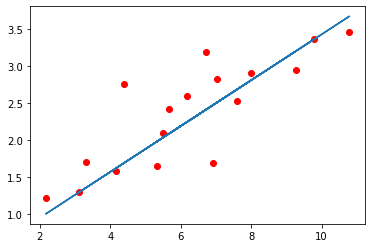

In [17]:
#训练

X,Y = get_data()
train_x,label = get_placeholder()
pred = inference(train_x)
loss = loss(pred,label)
#参数初始化
init = tf.global_variables_initializer()
optimizer=tf.train.GradientDescentOptimizer(0.001).minimize(loss)

with tf.Session() as sess:
	sess.run(init)
	for epoch in range(100):
		for x,y in zip(X,Y):
			sess.run(optimizer,feed_dict={train_x:x,label:y})
		if (epoch+1)%10==0:
			cost = sess.run(loss,feed_dict={train_x:x,label:y})
			print("%d epoch cost is %f"%(epoch+1,cost))

	ls = []
	for x,y in zip(X,Y):
		ls.append(sess.run(pred,feed_dict={train_x:x}))
	plt.scatter(X,Y,c='r')
	plt.plot(X,ls)
	plt.show()